In [130]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
rainfall = pd.read_csv("./cliflow_Niwa_Auckland_data/RainDaily.csv")
rainfall.head()

,Station,Date(NZST),Amount(mm),SofG,Deficit(mm),Runoff(mm),Period(Hrs),Freq
0,3925,20090101:0800,25.0,-,15.5,0.0,24,D
1,3925,20090102:0800,0.2,-,19.6,0.0,24,D
2,3925,20090103:0800,38.4,-,0.0,14.5,24,D
3,3925,20090104:0800,0.6,-,3.7,0.0,24,D
4,3925,20090105:0800,0.0,-,8.1,0.0,24,D


In [132]:
rainfall = rainfall.drop(['Station', 'SofG'], axis=1)
rainfall.set_index('Date(NZST)')
rainfall.index = pd.to_datetime(rainfall.index)
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5352 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000005351
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date(NZST)   5352 non-null   object 
 1   Amount(mm)   5352 non-null   float64
 2   Deficit(mm)  5352 non-null   float64
 3   Runoff(mm)   5352 non-null   float64
 4   Period(Hrs)  5352 non-null   int64  
 5   Freq         5352 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 292.7+ KB


<Axes: xlabel='Period', ylabel='mm'>

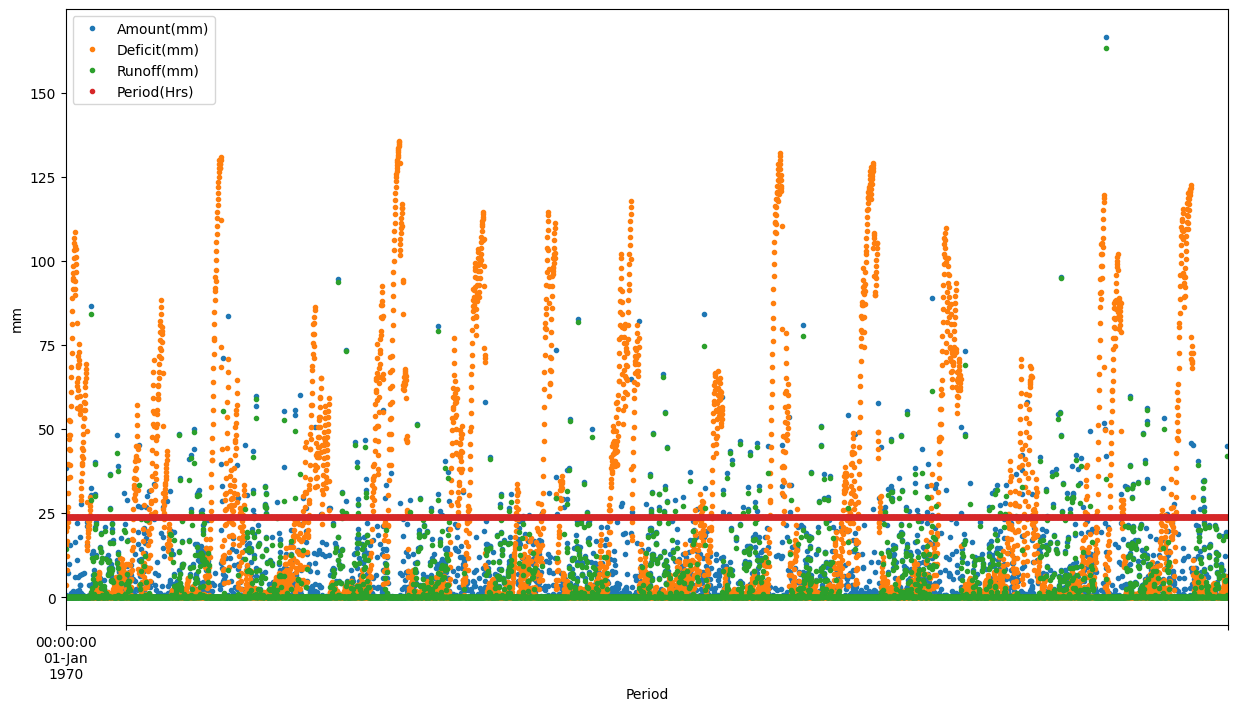

In [133]:
rainfall.plot(style="." , figsize=(15,8), xlabel = "Period", ylabel = "mm")

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

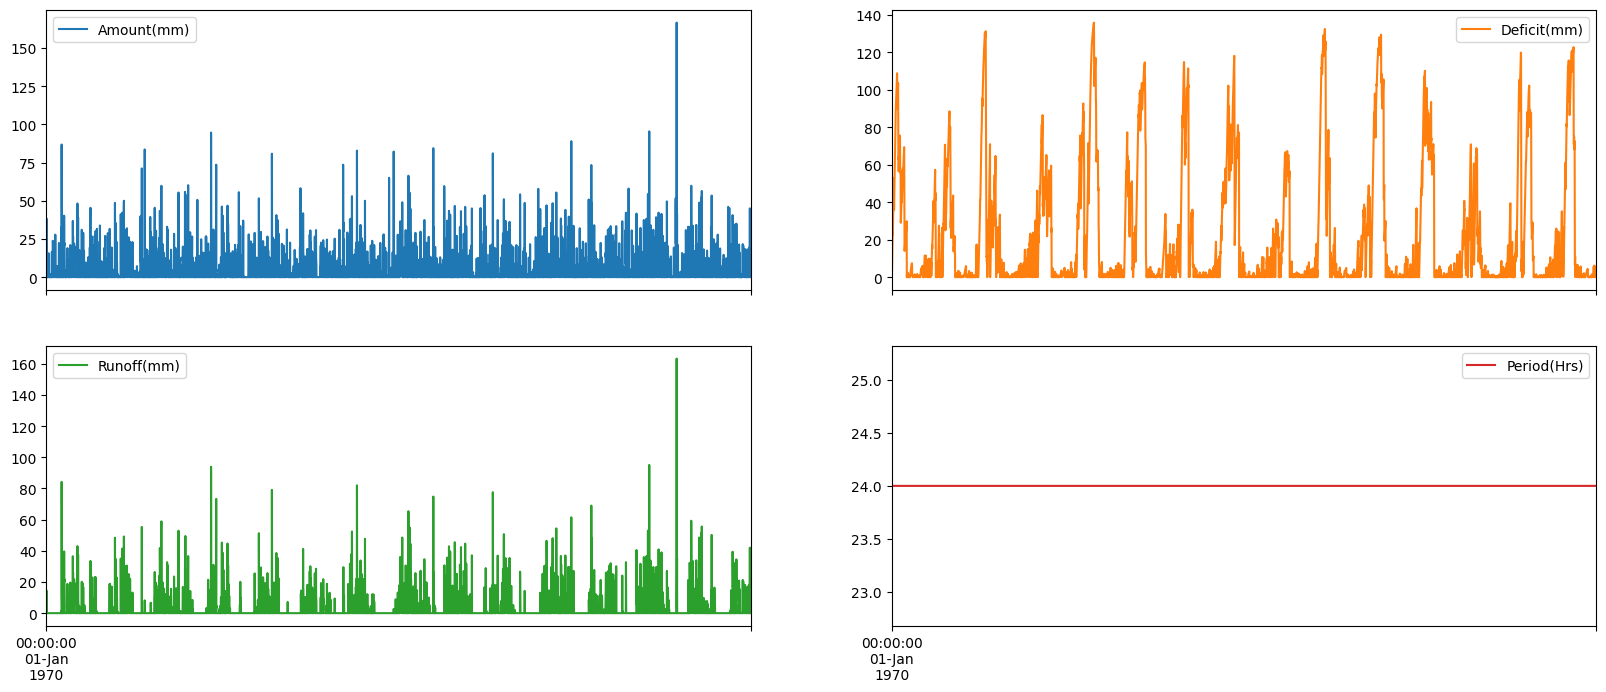

In [134]:
# rainfall_f = rainfall.filter(['Amount(mm)', 'Deficit(mm)', 'Runoff(mm)'], axis=1 )
# print("Precipitation vs Selected Attributes Graph")
# for i in range (rainfall_f.columns.size):
#     plt.subplot(3,2, i+1)
#     plt.scatter("Period(Hrs)", rainfall_f[rainfall_f.values[i][:100]])
#     plt.show()
rainfall.plot(subplots=True, layout=(2,2), figsize=(20,8))


/tmp/ipykernel_1000/1056539661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = rainfall.corr()


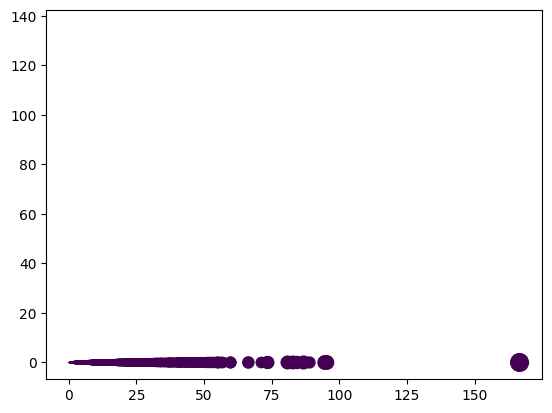

In [135]:
correlation_matrix = rainfall.corr()
plt.scatter(rainfall["Amount(mm)"], rainfall["Deficit(mm)"], rainfall["Runoff(mm)"], rainfall["Period(Hrs)"])


In [136]:
correlation_matrix["Amount(mm)"]

Amount(mm)     1.000000
Deficit(mm)   -0.185437
Runoff(mm)     0.852161
Period(Hrs)         NaN
Name: Amount(mm), dtype: float64

In [137]:
pressure_df = pd.read_csv('./cliflow_Niwa_Auckland_data/Pressure_9am_only.csv')
pressure_df = pressure_df.drop(['Station', 'tend', 'amt(hPa)', 'a24(hPa)'], axis=1)
pressure_df.head()
pd.merge(pressure_df, rainfall)


,Date(NZST),Pmsl(hPa),Pstn(hPa),Amount(mm),Deficit(mm),Runoff(mm),Period(Hrs),Freq
0,20090101:0800,1007.0,983.6,25.0,15.5,0.0,24,D
1,20090102:0800,1012.3,988.5,0.2,19.6,0.0,24,D
2,20090103:0800,1009.0,985.5,38.4,0.0,14.5,24,D
3,20090104:0800,1022.2,998.1,0.6,3.7,0.0,24,D
4,20090105:0800,1022.5,998.6,0.0,8.1,0.0,24,D
...,...,...,...,...,...,...,...,...
5346,20230823:0900,1029.1,1004.5,0.0,2.1,0.0,24,D
5347,20230824:0900,1027.2,1002.7,0.0,3.2,0.0,24,D
5348,20230825:0900,1028.0,1003.3,0.0,4.2,0.0,24,D
5349,20230826:0900,1024.9,1000.5,0.0,5.3,0.0,24,D


In [138]:
radiation_df = pd.read_csv('./cliflow_Niwa_Auckland_data/Radiation_Daily_Global.csv').drop(['Station'], axis=1)

rainbreakpoint_df = pd.read_csv("./cliflow_Niwa_Auckland_data/RainBreakpointsfromRainRate.csv").drop(['Station'], axis=1)
rainfall_df = pd.read_csv("./cliflow_Niwa_Auckland_data/RainDaily.csv").drop(['Station'], axis=1)
soilMoisture_df = pd.read_csv('./cliflow_Niwa_Auckland_data/SoilMoisture.csv').drop(['Station'], axis=1)
sunshine_df = pd.read_csv('./cliflow_Niwa_Auckland_data/SunshineDaily.csv').drop(['Station'], axis=1)
surfaceWind_df = pd.read_csv('./cliflow_Niwa_Auckland_data/SurfaceWind9am.csv').drop(['Station'], axis=1)
temperature_df = pd.read_csv('./cliflow_Niwa_Auckland_data/TemperatureMaxMinDaily.csv').drop(['Station'], axis=1)
observationAirTemperature_df = pd.read_csv('./cliflow_Niwa_Auckland_data/TemperatureScreenObs9amOnly.csv').drop(['Station'], axis=1)
windMaxGust_df = pd.read_csv('./cliflow_Niwa_Auckland_data/WindMaxGustDaily.csv').drop(['Station'], axis=1)

merged_df = [radiation_df, rainbreakpoint_df, rainfall_df, soilMoisture_df, sunshine_df, surfaceWind_df, temperature_df, observationAirTemperature_df, windMaxGust_df]
joindata = pd.concat(merged_df, join='outer', axis=1)
joindata.drop_duplicates() 
joindata.head()


,Date(NZST),Amount(MJ/m2),Period(Hrs),Type,Freq,Date(NZST)_Incl_secs,Amount(mm),Period(min),Freq,Date(NZST),...,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Date(NZST),Dir(DegT),Speed(m/s),Period(Hrs),Freq
0,20090719:2359,3.85,24.0,G,D,20090101:000830,0,8.5,BPS,20090101:0800,...,NaN,NaN,NaN,NaN,NaN,20090101:2259,275,9.3,24.0,D
1,20090720:2359,4.64,24.0,G,D,20090101:002330,0.16,15.0,BPS,20090102:0800,...,NaN,NaN,NaN,NaN,NaN,20090102:2259,44,11.8,24.0,D
2,20090721:2359,1.87,24.0,G,D,20090101:011112,0,47.7,BPS,20090103:0800,...,NaN,NaN,NaN,NaN,NaN,20090103:2259,13,11.8,24.0,D
3,20090722:2359,3.23,24.0,G,D,20090101:012236,0.12,11.4,BPS,20090104:0800,...,NaN,NaN,NaN,NaN,NaN,20090104:2259,190,7.7,24.0,D
4,20090723:2359,0.77,24.0,G,D,20090101:020436,0,42.0,BPS,20090105:0800,...,NaN,NaN,NaN,NaN,NaN,20090105:2259,185,7.2,24.0,D


<Axes: >

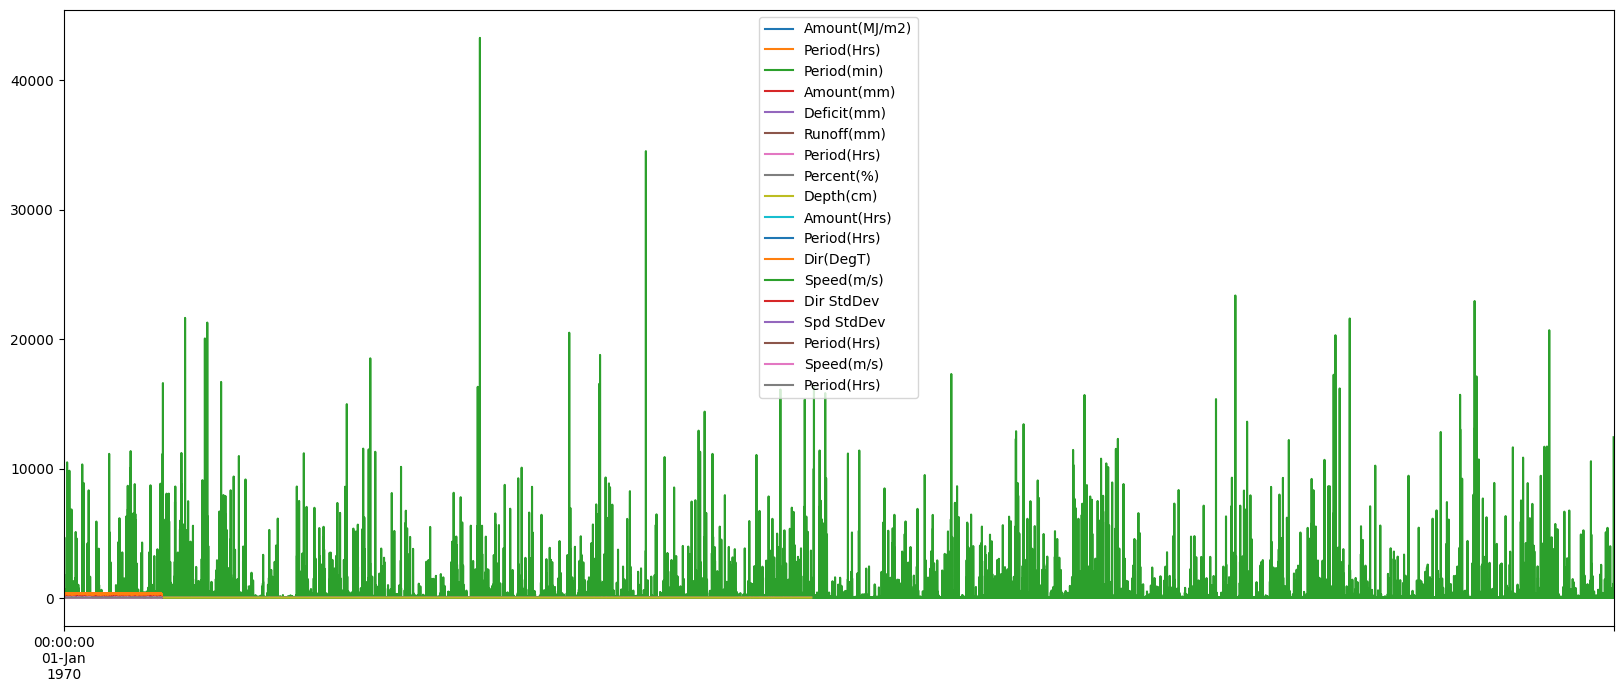

In [139]:
joindata.index = pd.to_datetime(joindata.index)
joindata.plot( figsize=(20,8))

In [ ]:
correlation = joindata.corr()
correlation

/tmp/ipykernel_1000/3782272016.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = joindata.corr()


,Amount(MJ/m2),Period(Hrs),Period(min),Amount(mm),Deficit(mm),Runoff(mm),Period(Hrs),Percent(%),Depth(cm),Amount(Hrs),Period(Hrs),Dir(DegT),Speed(m/s),Dir StdDev,Spd StdDev,Period(Hrs),Speed(m/s),Period(Hrs)
Amount(MJ/m2),1.000000,NaN,-0.046623,0.005649,0.126762,0.011880,NaN,-0.120792,NaN,-0.101393,NaN,-0.039759,-0.091473,-0.109348,-0.097511,NaN,-0.234788,NaN
Period(Hrs),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Period(min),-0.046623,NaN,1.000000,-0.004822,-0.003175,0.000203,NaN,-0.000977,NaN,0.022161,NaN,-0.001034,0.007069,0.012651,0.001736,NaN,0.000978,NaN
Amount(mm),0.005649,NaN,-0.004822,1.000000,-0.185437,0.852161,NaN,0.017424,NaN,-0.128214,NaN,-0.049708,0.116329,0.047905,0.130204,NaN,0.066125,NaN
Deficit(mm),0.126762,NaN,-0.003175,-0.185437,1.000000,-0.235970,NaN,-0.021683,NaN,0.268133,NaN,0.025008,-0.004513,0.013579,-0.007361,NaN,0.079899,NaN
Runoff(mm),0.011880,NaN,0.000203,0.852161,-0.235970,1.000000,NaN,0.022555,NaN,-0.149050,NaN,-0.037400,0.067108,0.026328,0.075251,NaN,0.002551,NaN
Period(Hrs),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percent(%),-0.120792,NaN,-0.000977,0.017424,-0.021683,0.022555,NaN,1.000000,NaN,0.051399,NaN,0.031487,-0.016310,0.143563,0.007991,NaN,0.044227,NaN
Depth(cm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount(Hrs),-0.101393,NaN,0.022161,-0.128214,0.268133,-0.149050,NaN,0.051399,NaN,1.000000,NaN,0.033344,-0.006416,0.068599,-0.042960,NaN,0.087795,NaN


/tmp/ipykernel_1000/4198031516.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sb.heatmap(joindata.corr())


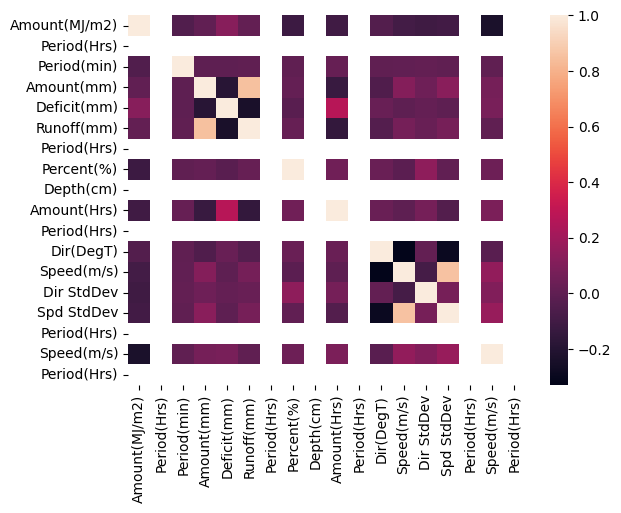

In [ ]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb


joindata.drop(['Period(Hrs)'], axis=1)
# plotting correlation heatmap
dataplot=sb.heatmap(joindata.corr())
  
# displaying heatmap
mp.show()